In [1]:
#det her er den udgave med det cleanede data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C:\Users\astri\AppData\Local\Temp\ipykernel_10336\663791057.py:10: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [28]:
data = pd.read_pickle("labeled_content.pkl")

In [29]:
def bin_target(x):
    if x=="reliable":
        return 0
    if x=="fake":
        return 1

y = data["type"].apply(lambda x:bin_target(x)).astype(int)
X = data["content"]
X_train, X_val, y_train, y_val= train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val,y_val, test_size=0.5,random_state=0,shuffle=True) 

In [30]:
def fun(doc):
   return doc

vectorizer = TfidfVectorizer(
    tokenizer=fun,
    preprocessor=fun,
    token_pattern=None)  

In [31]:
X_train_vec = vectorizer.fit_transform(X_train)
print(X_train_vec.shape)

(336608, 827974)


In [32]:
X_val_vec = vectorizer.transform(X_val)
print(X_val.shape)

(42076,)


In [33]:
X_test_vec = vectorizer.transform(X_test)
print(X_test.shape)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\astri\miniconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\astri\AppData\Local\Temp\ipykernel_10336\2128377889.py", line 1, in <module>
    X_test_vec = vectorizer.transform(X_test)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\astri\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py", line 2162, in transform
    X = super().transform(raw_documents)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\astri\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py", line 1434, in transform
    _, X = self._count_vocab(raw_documents, fixed_vocab=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\astri\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py", line -1, in _count_vocab
KeyboardInterrupt

During handling of the above exception, another ex

In [7]:
#try with different activation function
clf2 = MLPClassifier(random_state=1, hidden_layer_sizes=(20,20), max_iter=1,verbose=True,tol=0.1,n_iter_no_change=2, activation="tanh").fit(X_train_vec, y_train)

Iteration 1, loss = 0.14624375


c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
y_pred = clf2.predict(X_val_vec)
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))

accuracy: 0.9591215895047057
F1: 0.9572373328029437


In [11]:
#try with different activation function
#clf3 = MLPClassifier(random_state=1, hidden_layer_sizes=(20,20), max_iter=1,verbose=True,tol=0.1,n_iter_no_change=2, activation="logistic").fit(X_train, y_train)
#y_pred = clf3.predict(X_val)
#print("accuracy:", accuracy_score(y_pred,y_val))
#print("F1:", f1_score(y_pred,y_val))

In [9]:
#try with more layers
clf4 = MLPClassifier(random_state=1, hidden_layer_sizes=(20,20,20,20,20), max_iter=1,verbose=True,tol=0.1,n_iter_no_change=2,activation="tanh").fit(X_train_vec, y_train)
y_pred = clf4.predict(X_val_vec)
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))

Iteration 1, loss = 0.13680762


c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy: 0.955081281490636
F1: 0.9525101763907734


In [11]:
#try with less neurons
#husk at justere antal lag så det er det bedste
clf5 = MLPClassifier(random_state=1, hidden_layer_sizes=(10,), max_iter=1,verbose=True,tol=0.1,n_iter_no_change=2,activation="tanh").fit(X_train_vec, y_train)
y_pred = clf5.predict(X_val_vec)
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))

Iteration 1, loss = 0.22233638


c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy: 0.9527046297176538
F1: 0.9507254989352746


In [12]:
#try with more neurons
#husk at justere antal lag så det er det bedste
clf5 = MLPClassifier(random_state=1, hidden_layer_sizes=(50,50), max_iter=1,verbose=True,tol=0.1,n_iter_no_change=2,activation="tanh").fit(X_train_vec, y_train)
y_pred = clf5.predict(X_val_vec)
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))

c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


accuracy: 0.9326932217891435
F1: 0.930455282157065


In [16]:

clf5 = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10), max_iter=1,verbose=True,activation="tanh").fit(X_train_vec, y_train)
y_pred = clf5.predict(X_val_vec)
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))

Iteration 1, loss = 0.16668640


c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy: 0.9589314573628672
F1: 0.9572171329537014


In [14]:
clf6 = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10,10), max_iter=1,verbose=True,tol=0.1,n_iter_no_change=2,activation="tanh").fit(X_train, y_train)
y_pred = clf5.predict(X_val)
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))

Iteration 1, loss = 0.15398986


c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy: 0.9590740564692462
F1: 0.9573910031177315


In [ ]:
#model = MLPClassifier(random_state=1, max_iter=1,tol=0.1,n_iter_no_change=2,early_stopping=True)
#distributions = dict(hidden_layer_sizes=[(50,50,50),(20,20,20,20,20),(100,100,100)],activation=["logistic", "tanh", "relu"])
#get_best = RandomizedSearchCV(model, distributions, random_state=1)
#search = get_best.fit(X_train, y_train)
#search.best_params_


c:\Users\astri\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


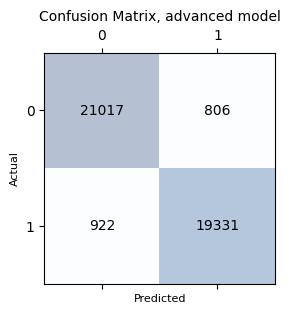

In [17]:
#evaluation
clf = clf5
y_pred = clf.predict(X_val)
cm = confusion_matrix(y_true=y_val,y_pred=y_pred)

fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(2):
    for j in range(2):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')
 
plt.xlabel('Predicted', fontsize=8)
plt.ylabel('Actual', fontsize=8)
plt.title('Confusion Matrix, advanced model', fontsize=10)
plt.show()


In [18]:
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
print("Precision:", precision)
print("Recall:", recall)

accuracy: 0.9589314573628672
F1: 0.9572171329537014
Precision: 0.959974176888315
Recall: 0.954475880116526


In [19]:
#model = MLPClassifier(random_state=1, max_iter=1,verbose=True,tol=0.01,n_iter_no_change=3,early_stopping=True)
#clf = GridSearchCV(model,{"hidden_layer_sizes":((50,50,50),(20,20,20,20,20),(50,)),"activation":"‘identity’, ‘logistic’, ‘tanh’, ‘relu’"}, scoring='f1', cv=5)
#clf.fit(X_train,y_train)

Evaluation on Fake news test-set

In [20]:
bestmodel = clf5
def evaluate(model, name,test_vec):
    print(f"evaluating {name}")
    y_pred = model.predict(test_vec)
    print("accuracy:", accuracy_score(y_pred,y_test))
    print("F1:", f1_score(y_pred,y_test))
    precision = precision_score(y_val, y_test)
    recall = recall_score(y_val, y_test)
    print("Precision:", precision)
    print("Recall:", recall)
    cm = confusion_matrix(y_true=y_test,y_pred=y_test)
    fig, ax = plt.subplots(figsize=(3,3))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(2):
        for j in range(2):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')
    plt.xlabel('Predicted', fontsize=8)
    plt.ylabel('Actual', fontsize=8)
    plt.title(f'Confusion Matrix, {name}', fontsize=10)
    plt.show()

In [21]:
evaluate(bestmodel, "advanced model",X_test_vec)

evaluating advanced model


ValueError: Expected 2D array, got scalar array instead:
array=TfidfVectorizer(preprocessor=<function fun at 0x0000028EBB5FC360>,
                token_pattern=None,
                tokenizer=<function fun at 0x0000028EBB5FC360>).
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#getting baseline for same dataset: logistic regression where x is length of article
X_len_train = pd.DataFrame(X_train.apply(lambda x: len(x))) #get feature with length of article
X_len_val = pd.DataFrame(X_val.apply(lambda x: len(x))) #fjern den her linje
X_len_test = pd.DataFrame(X_test.apply(lambda x: len(x))) 

baseline1 = LogisticRegression()
reg = baseline1.fit(X_len_train,y_train)

y_pred = baseline1.predict(X_len_val) #er det test eller validation?
acc = accuracy_score(y_pred,y_val) #fjern den her også

print(acc) #fjern den her også

In [ ]:
#getting baseline 2 for same dataset
def word_count_reg(field,word):
    count = 0
    for words in field:
        if words == word:
            count+=1
    return count      

X_fact_train = pd.DataFrame(X_train.apply(lambda x: word_count_reg(x,"fact")))
X_fact_val = pd.DataFrame(X_val.apply(lambda x: word_count_reg(x,"fact"))) #fjern
X_fact_test = pd.DataFrame(X_test.apply(lambda x: word_count_reg(x,"fact"))) #fjern


baseline2 = LogisticRegression(penalty=None)
reg = baseline2.fit(X_fact_train,y_train)

y_pred = baseline2.predict(X_fact_val) #fjern
print(accuracy_score(y_pred,y_val)) #fjern


In [ ]:
evaluate(baseline1, "baseline: length of articles",X_len_test)

In [ ]:
evaluate(baseline2, 'baseline: # of "facts"',X_fact_test)

Evaluation on the LIAR dataset

In [ ]:
liar = pd.read_pickle("labeled_liar_statements_preprocessed.pkl")

In [ ]:
print(liar.head())

In [ ]:
print(len(liar))
print(liar["Label"].value_counts())

12791
1
half-true      2627
false          2507
mostly-true    2454
barely-true    2103
true           2053
pants-fire     1047
Name: count, dtype: int64
           0            1                                                  2   \
0   2635.json        false  Says the Annies List political group supports ...   
1  10540.json    half-true  When did the decline of coal start? It started...   
2    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json        false  Health care reform legislation is likely to ma...   
4   9028.json    half-true  The economic turnaround started at the end of ...   

                                   3               4                     5   \
0                            abortion    dwayne-bohac  State representative   
1  energy,history,job-accomplishments  scott-surovell        State delegate   
2                      foreign-policy    barack-obama             President   
3                         health-care    bl

In [ ]:
true = set(["half-true","mostly-true","barely-true","true"])
false = set(["false","pants-fire"])
def get_bin_y_liar(x):
    if x in true:
        return 0
    if x in false:
        return 1
    
liar["Label"] = liar["Label"].apply(lambda x: get_bin_y_liar(x))
print(len(liar))
liar = liar[liar["Label"]==1 or liar["Label"]==0] #fjern nans
print(len(liar))
y_test = liar["Label"]
X_test = liar["Statement"]

In [ ]:
print("balance of classes in test set:")
print("share of class 1 data points: ", print(len(y_test[y_test["Label"]==1])/len(y_test)))

In [ ]:
#baseline 1
X_test_baseline1=X_test.apply(lambda x: len(x))
X_test_baseline1.describe() #get length statistics

In [ ]:
#baseline2
X_test_baseline2 = X_test.apply(lambda x:word_count_reg(x,"fact"))

In [ ]:
#advmodel
X_test_advmodel = vectorizer.transform(X_test)

In [ ]:
evaluate(baseline1, "baseline model", X_test_baseline1)

In [ ]:
evaluate(baseline2, "baseline model", X_test_baseline2)

In [ ]:
evaluate(bestmodel, "advanced model", X_test_advmodel)